# Python code to fit spectra (gaussian,Linear,quadratic and cubic)
## This code will read QSO spectra and try to fit the various emission profiles.
## Reference paper: Dong et al, Mon. Not. R. Astron. Soc. 383, 581-592 (2008)

###Date 15th March 2018


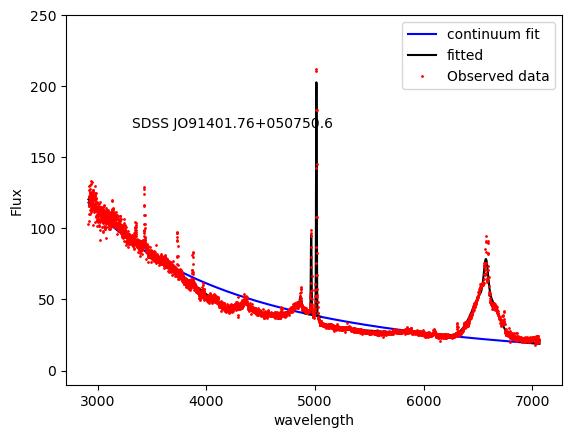

In [1]:
#=================================================================================
from numpy import sqrt, pi, exp, linspace
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Reading the data
data=np.loadtxt('spec-1193-52652-0153.dat')
x=data[:,0]
y=data[:,1]
x=x/1.30

#Continuum fitting and subtraction
def func(x,a,b):
    return a*(x)**(-b)
optimizedParameters, pcov = opt.curve_fit(func, x,y)
plt.plot(x,func(x,*optimizedParameters), 'b-',markersize=5,label = 'continuum fit')
k=func(x,*optimizedParameters)
for i in range (0,3844):
 y[i]=y[i]-k[i]

# H alpha curve fitting----------------------------------------------------------------------------------
plt.ylim(-10,200)
xha= data[3244:3844,0]
yha= data[3244:3844,1] 
xha=xha/1.30
def gaussian(xha, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xha-cen)**2 /wid)+amp1 * exp(-(xha-cen1)**2 /wid1)
init_vals = [273, 6563, 22, 214, 6563, 626]
popt,pcov = curve_fit(gaussian, xha, yha, p0=init_vals)
t=gaussian(xha,*popt)
for i in range (3244,3844): 
 t[i-3244]=t[i-3244]+k[i]

plt.plot(xha,t, 'k-',markersize=3, label='fitted') 

# quadratic eqn. curve fitting----------------------------------------------------------------------------------

q1= data[2389:3244,0]
q2= data[2389:3244,1] 
q1=q1/1.30
def agn(a,x,b,c):
    return a*x**2+b*x+c
init_vals = [273,5800,22]
popt,pcov = curve_fit(agn, q1, q2, p0=init_vals)
t1=agn(q1,*popt)
for i in range (2389,3244): 
 t1[i-2389]=t1[i-2389]+k[i]
plt.plot(q1,t1, 'k-',markersize=3) 


# O III curve fitting------------------------------------------------------------------------------------------------------------

xo= data[2270:2385,0]
yo= data[2270:2385,1]
xo=xo/1.30
def gaussian(xo, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xo-cen)**2 /wid)+amp1 * exp(-(xo-cen1)**2 /wid1)
init_vals = [273, 4957, 22, 214, 5007, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xo, yo, p0=init_vals)
t2=gaussian(xo,*popt)
for i in range (2270,2385):
 t2[i-2270]=t2[i-2270]+k[i]
plt.plot(xo,t2, 'k-',markersize=3) 

#H beta curve fitting----------------------------------------------------------------------------------
xhb= data[2185:2275,0]
yhb= data[2185:2275,1]
xhb=xhb/1.30
def gaussian(xhb, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xhb-cen)**2 /wid)+amp1 * exp(-(xhb-cen1)**2 /wid1)
init_vals = [273, 4862, 22, 214, 4862, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xhb, yhb, p0=init_vals)
t3=gaussian(xhb,*popt)
#print(t3)
for i in range (2185,2275):
 tt=i-2185
 t3[tt]=t3[tt]+k[i]


plt.plot(xhb,t3, 'k-',markersize=3) 

# H gamma curve fitting------------------------------------------------------------------------------------------------------------
xhg= data[1684:1800,0]
yhg= data[1684:1800,1]
xhg=xhg/1.30
def gaussian(xhg, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xhg-cen)**2 /wid)+amp1 * exp(-(xhg-cen1)**2 /wid1)
init_vals = [273, 4341, 22, 214, 4342, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xhg, yhg, p0=init_vals)
t4=gaussian(xhg,*popt)
for i in range (1684,1800):
 t4[i-1684]=t4[i-1684]+k[i]
plt.plot(xhg,t4, 'k-',markersize=3) 


#cubic-----------------------------------------------------------------------------------
x1= data[1800:2185,0]
y1= data[1800:2185,1]
x1=x1/1.30
def cubic(x1,a,b,c):
    return a*x1*x1*x1+b*x1*x1+c
init_vals = [273, 5900, 22]     # for [amp, cen, wid]
popt,pcov = curve_fit(cubic, x1, y1, p0=init_vals)
t5=cubic(x1,*popt)
for i in range (1800,2185):
 t5[i-1800]=t5[i-1800]+k[i]
plt.plot(x1,t5, 'k-',markersize=3) 

#cubic-----------------------------------------------------------------------------------

x2= data[0:1580,0]
y2= data[0:1580,1]
x2=x2/1.30
def cubic(x1,a,b,c):
 return a*x2*x2*x2+b*x2*x2+c
init_vals = [273, 5900, 22]     # for [amp, cen, wid]
popt,pcov = curve_fit(cubic, x2, y2, p0=init_vals)
t6=cubic(x1,*popt)
for i in range (0,1580):
 t6[i]=t6[i]+k[i]
plt.plot(x2,t6, 'k-',markersize=3)
for i in range (0,3844):
 y[i]=y[i]+k[i]
plt.plot(x,y,'ro',markersize=1,label='Observed data')
ax=plt.gca()
ax.annotate("SDSS JO91401.76+050750.6",xy=(3313,171))


### Axis Label 
plt.xlabel('wavelength')
plt.ylabel('Flux')
plt.ylim(-10,250)
plt.legend()
plt.show()
